<a href="https://colab.research.google.com/github/ssssuyeon/bigdata-analysis/blob/main/w4_R4ds_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# R for Data Science 실습
Data Transformation & Data Visualization

In [4]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Pipes 
tidyverse 패키지를 불러왔으므로 pipes operations를 사용가능

In [5]:
cars

speed,dist
<dbl>,<dbl>
4,2
4,10
7,4
7,22
8,16
9,10
10,18
10,26
10,34


In [6]:
summary(cars)

     speed           dist       
 Min.   : 4.0   Min.   :  2.00  
 1st Qu.:12.0   1st Qu.: 26.00  
 Median :15.0   Median : 36.00  
 Mean   :15.4   Mean   : 42.98  
 3rd Qu.:19.0   3rd Qu.: 56.00  
 Max.   :25.0   Max.   :120.00  

In [7]:
cars %>% summary()

     speed           dist       
 Min.   : 4.0   Min.   :  2.00  
 1st Qu.:12.0   1st Qu.: 26.00  
 Median :15.0   Median : 36.00  
 Mean   :15.4   Mean   : 42.98  
 3rd Qu.:19.0   3rd Qu.: 56.00  
 Max.   :25.0   Max.   :120.00  

In [8]:
head(cars, 3)
 #cars 데이터에서 앞에서 3개까지 확인

,speed,dist
,<dbl>,<dbl>
1,4,2
2,4,10
3,7,4


In [9]:
cars %>% head(3)
#pipes operation의 첫번째가 함수의 첫번째 인자로 들어감

,speed,dist
,<dbl>,<dbl>
1,4,2
2,4,10
3,7,4


## Data transformation - dplyr
nycflights13

Dataset on flights departing New York City in 2013

In [10]:
install.packages("nycflights13")
library(nycflights13)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [11]:
flights[1:5,]

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00


- __< int >__ stands for integers.
- __< dbl >__ stands for doubles, or real numbers.
- __< chr >__ stands for character vectors, or strings.
- __< dttm >__ stands for date-times (a date + a time).
- __< lgl >__ stands for logical, vectors that contain only TRUE or FALSE.
- __< fctr >__ stands for factors, which R uses to represent categorical variables with fixed possible values.
- __< date >__ stands for dates.

### Filter rows with filter()

In [13]:
filter(flights, month == 1, day == 1) %>% head()
#1월 1일자 항공 정보들 

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [14]:
flights %>% filter(month == 1, day == 1) %>% filter(dest == 'ORD') %>% head()
#추가적으로 filter를 적용할 수 있음 : pipes의 장점

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,558,600,-2,753,745,8,AA,301,N3ALAA,LGA,ORD,138,733,6,0,2013-01-01 06:00:00
2013,1,1,608,600,8,807,735,32,MQ,3768,N9EAMQ,EWR,ORD,139,719,6,0,2013-01-01 06:00:00
2013,1,1,629,630,-1,824,810,14,AA,303,N3CYAA,LGA,ORD,140,733,6,30,2013-01-01 06:00:00
2013,1,1,656,700,-4,854,850,4,AA,305,N4WNAA,LGA,ORD,143,733,7,0,2013-01-01 07:00:00
2013,1,1,709,700,9,852,832,20,UA,1092,N26226,LGA,ORD,135,733,7,0,2013-01-01 07:00:00


In [16]:
flights %>% filter(month == 1, day == 1 & dest == 'ORD') %>% head()
# & 연산을 써도 결과는 같음

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,558,600,-2,753,745,8,AA,301,N3ALAA,LGA,ORD,138,733,6,0,2013-01-01 06:00:00
2013,1,1,608,600,8,807,735,32,MQ,3768,N9EAMQ,EWR,ORD,139,719,6,0,2013-01-01 06:00:00
2013,1,1,629,630,-1,824,810,14,AA,303,N3CYAA,LGA,ORD,140,733,6,30,2013-01-01 06:00:00
2013,1,1,656,700,-4,854,850,4,AA,305,N4WNAA,LGA,ORD,143,733,7,0,2013-01-01 07:00:00
2013,1,1,709,700,9,852,832,20,UA,1092,N26226,LGA,ORD,135,733,7,0,2013-01-01 07:00:00


In [17]:
flights %>% filter(month == 1 & day == 1 & dest %in% c('ORD','LAS') ) %>% head()
#데스티네이션이 ORD나 LAS인 것

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,558,600,-2,753,745,8,AA,301,N3ALAA,LGA,ORD,138,733,6,0,2013-01-01 06:00:00
2013,1,1,559,600,-1,854,902,-8,UA,1187,N76515,EWR,LAS,337,2227,6,0,2013-01-01 06:00:00
2013,1,1,608,600,8,807,735,32,MQ,3768,N9EAMQ,EWR,ORD,139,719,6,0,2013-01-01 06:00:00
2013,1,1,629,630,-1,824,810,14,AA,303,N3CYAA,LGA,ORD,140,733,6,30,2013-01-01 06:00:00
2013,1,1,651,655,-4,936,942,-6,B6,203,N558JB,JFK,LAS,323,2248,6,55,2013-01-01 06:00:00


### Arrange rows with arrange()

In [19]:
arrange(flights, year, month, day) %>% head()
#year, month, day로 잘 정렬됐음을 볼 수 있다 -> head()를 지우면 더 눈으로 확인 가능

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [21]:
arrange(flights, desc(dep_delay)) %>% head()
# dep_delay변수로 내림차순으로 정렬

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,9,641,900,1301,1242,1530,1272,HA,51,N384HA,JFK,HNL,640,4983,9,0,2013-01-09 09:00:00
2013,6,15,1432,1935,1137,1607,2120,1127,MQ,3535,N504MQ,JFK,CMH,74,483,19,35,2013-06-15 19:00:00
2013,1,10,1121,1635,1126,1239,1810,1109,MQ,3695,N517MQ,EWR,ORD,111,719,16,35,2013-01-10 16:00:00
2013,9,20,1139,1845,1014,1457,2210,1007,AA,177,N338AA,JFK,SFO,354,2586,18,45,2013-09-20 18:00:00
2013,7,22,845,1600,1005,1044,1815,989,MQ,3075,N665MQ,JFK,CVG,96,589,16,0,2013-07-22 16:00:00
2013,4,10,1100,1900,960,1342,2211,931,DL,2391,N959DL,JFK,TPA,139,1005,19,0,2013-04-10 19:00:00


### Select columns with select()

In [22]:
select(flights, year, month, day) %>% head()

year,month,day
<int>,<int>,<int>
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1


In [24]:
select(flights, year:day) %>% head()
#똑같이 나옴을 확인

year,month,day
<int>,<int>,<int>
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1


In [28]:
flights %>% head()

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [29]:
select(flights, year:sched_arr_time) %>% head()
#변수 범위를 바꿀 수 있음

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>
2013,1,1,517,515,2,830,819
2013,1,1,533,529,4,850,830
2013,1,1,542,540,2,923,850
2013,1,1,544,545,-1,1004,1022
2013,1,1,554,600,-6,812,837
2013,1,1,554,558,-4,740,728


In [30]:
select(flights, -(year:day)) %>% head()
#year부터 day까지 제외하고 select

dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


### Helper functions

- starts_with("abc"): matches names that begin with “abc”.
- ends_with("xyz"): matches names that end with “xyz”.
- contains("ijk"): matches names that contain “ijk”.
- num_range("x", 1:3): matches x1, x2 and x3.

In [31]:
select(flights, starts_with("arr")) %>% head()
# arr로 시작하는 변수 select

arr_time,arr_delay
<int>,<dbl>
830,11
850,20
923,33
1004,-18
812,-25
740,12


In [32]:
select(flights, contains("arr")) %>% head()
# arr를 포함하는 변수들을 select, 나머지 function들은 따로 해보기

arr_time,sched_arr_time,arr_delay,carrier
<int>,<int>,<dbl>,<chr>
830,819,11,UA
850,830,20,UA
923,850,33,AA
1004,1022,-18,B6
812,837,-25,DL
740,728,12,UA


Rename the variable with rename()

In [34]:
rename(flights, tail_num = tailnum) %>% head()
#이전에 tailnum이였던 변수명이 tail_num으로 바뀜을 확인

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tail_num,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


Or using traditional R using colnames()

In [37]:
colnames(flights)

[1] "year"           "month"          "day"            "dep_time"      
 [5] "sched_dep_time" "dep_delay"      "arr_time"       "sched_arr_time"
 [9] "arr_delay"      "carrier"        "flight"         "tailnum"       
[13] "origin"         "dest"           "air_time"       "distance"      
[17] "hour"           "minute"         "time_hour"

In [38]:
colnames(flights)[1] = 'year1'

In [40]:
flights %>% head()
# 첫번째 변수가 year1으로 바뀜을 확인

year1,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [43]:
select(flights, time_hour, air_time, everything()) %>% head()
#time_hour, air_time을 앞으로 보내고 나머지는 그대로 

time_hour,air_time,year1,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,distance,hour,minute
<dttm>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
2013-01-01 05:00:00,227,2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,1400,5,15
2013-01-01 05:00:00,227,2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,1416,5,29
2013-01-01 05:00:00,160,2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,1089,5,40
2013-01-01 05:00:00,183,2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,1576,5,45
2013-01-01 06:00:00,116,2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,762,6,0
2013-01-01 05:00:00,150,2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,719,5,58


### Add new variables with mutate()

In [45]:
flights %>% select(year1:day, ends_with("delay"), distance, air_time) %>% head()

year1,month,day,dep_delay,arr_delay,distance,air_time
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
2013,1,1,2,11,1400,227
2013,1,1,4,20,1416,227
2013,1,1,2,33,1089,160
2013,1,1,-1,-18,1576,183
2013,1,1,-6,-25,762,116
2013,1,1,-4,12,719,150


In [47]:
flights %>% 
    select(year1:day, ends_with("delay"), distance, air_time) %>% 
    mutate(gain = dep_delay - arr_delay,
              hours = air_time / 60,
              gain_per_hour = gain / hours) %>% head()

year1,month,day,dep_delay,arr_delay,distance,air_time,gain,hours,gain_per_hour
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2013,1,1,2,11,1400,227,-9,3.783333,-2.378855
2013,1,1,4,20,1416,227,-16,3.783333,-4.229075
2013,1,1,2,33,1089,160,-31,2.666667,-11.625000
2013,1,1,-1,-18,1576,183,17,3.050000,5.573770
2013,1,1,-6,-25,762,116,19,1.933333,9.827586
2013,1,1,-4,12,719,150,-16,2.500000,-6.400000


In [50]:
flights %>% 
    select(year1:day, ends_with("delay"), distance, air_time) %>% 
    transmute(gain = dep_delay - arr_delay,
              hours = air_time / 60,
              gain_per_hour = gain / hours) %>% head()
# 생성된 변수들만 보고싶을 때 : transmute 함수 사용

gain,hours,gain_per_hour
<dbl>,<dbl>,<dbl>
-9,3.783333,-2.378855
-16,3.783333,-4.229075
-31,2.666667,-11.625000
17,3.050000,5.573770
19,1.933333,9.827586
-16,2.500000,-6.400000


In [52]:
flights %>% 
    select(year1:day, ends_with("delay"), distance, air_time) %>% 
    mutate(gain = dep_delay - arr_delay,
              hours = air_time / 60,
              gain_per_hour = gain / hours) %>% select(gain:gain_per_hour) %>% head()
# transmute 안써도 똑같은 결과 생성

gain,hours,gain_per_hour
<dbl>,<dbl>,<dbl>
-9,3.783333,-2.378855
-16,3.783333,-4.229075
-31,2.666667,-11.625000
17,3.050000,5.573770
19,1.933333,9.827586
-16,2.500000,-6.400000


### Grouped summaries with summarise()

In [54]:
flights %>% summarise(delay = mean(dep_delay, na.rm = TRUE))

delay
<dbl>
12.63907


In [56]:
colnames(flights)[1] = 'year'

In [57]:
flights %>% group_by(year, month, day) %>% 
summarise(delay = mean(dep_delay, na.rm = TRUE)) %>% head()
# 각 그룹마다 평균을 보고 싶을 때

`summarise()` has grouped output by 'year', 'month'. You can override using the `.groups` argument.



year,month,day,delay
<int>,<int>,<int>,<dbl>
2013,1,1,11.548926
2013,1,2,13.858824
2013,1,3,10.987832
2013,1,4,8.951595
2013,1,5,5.732218
2013,1,6,7.148014


In [60]:
flights %>% group_by(year, month) %>% 
summarise(delay = mean(dep_delay, na.rm = TRUE)) %>% head()
#월 별로도 볼 수 있음

`summarise()` has grouped output by 'year'. You can override using the `.groups` argument.



year,month,delay
<int>,<int>,<dbl>
2013,1,10.03667
2013,2,10.81684
2013,3,13.22708
2013,4,13.93804
2013,5,12.98686
2013,6,20.84633


In [63]:
flights %>% group_by(year, month, day) %>% 
summarise(delay = mean(dep_delay, na.rm = TRUE), delay_N = n(), delay_sd = sd(dep_delay, na.rm = TRUE)) %>% head()
#평균뿐 아니라 개수와 표준편차까지 확인

`summarise()` has grouped output by 'year', 'month'. You can override using the `.groups` argument.



year,month,day,delay,delay_N,delay_sd
<int>,<int>,<int>,<dbl>,<int>,<dbl>
2013,1,1,11.548926,842,45.26135
2013,1,2,13.858824,943,37.20873
2013,1,3,10.987832,914,31.45735
2013,1,4,8.951595,915,27.73426
2013,1,5,5.732218,720,25.73426
2013,1,6,7.148014,832,23.16834


In [65]:
flights %>% group_by(year, month) %>% 
summarise(delay = mean(dep_delay, na.rm = TRUE), delay_N = n(), delay_sd = sd(dep_delay, na.rm = TRUE)) %>% head()
#뿐 아니라 분산도 볼 수 있음

`summarise()` has grouped output by 'year'. You can override using the `.groups` argument.



year,month,delay,delay_N,delay_sd
<int>,<int>,<dbl>,<int>,<dbl>
2013,1,10.03667,27004,36.39031
2013,2,10.81684,24951,36.26655
2013,3,13.22708,28834,40.13097
2013,4,13.93804,28330,42.96626
2013,5,12.98686,28796,39.35283
2013,6,20.84633,28243,51.45694


In [ ]:
flights %>% group_by(origin) %>% 
summarise(delay = mean(dep_delay, na.rm = TRUE), sd_delay = sd(dep_delay, na.rm = TRUE)) %>% head()

In [66]:
flights %>% group_by(dest) %>% 
   summarise(count = n(), dist = mean(distance, na.rm = TRUE), delay = mean(arr_delay, na.rm = TRUE) ) %>%
   filter(count > 20, dest != "HNL") %>% head()
# dest = "HNL"은 distance 변수에서 outlier여서 제외해 줌

dest,count,dist,delay
<chr>,<int>,<dbl>,<dbl>
ABQ,254,1826.0000,4.381890
ACK,265,199.0000,4.852273
ALB,439,143.0000,14.397129
ATL,17215,757.1082,11.300113
AUS,2439,1514.2530,6.019909
AVL,275,583.5818,8.003831


It looks like delays increase with distance up to ~750 miles and then decrease. Maybe as flights get longer there's more ability to make up delays in the air?

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



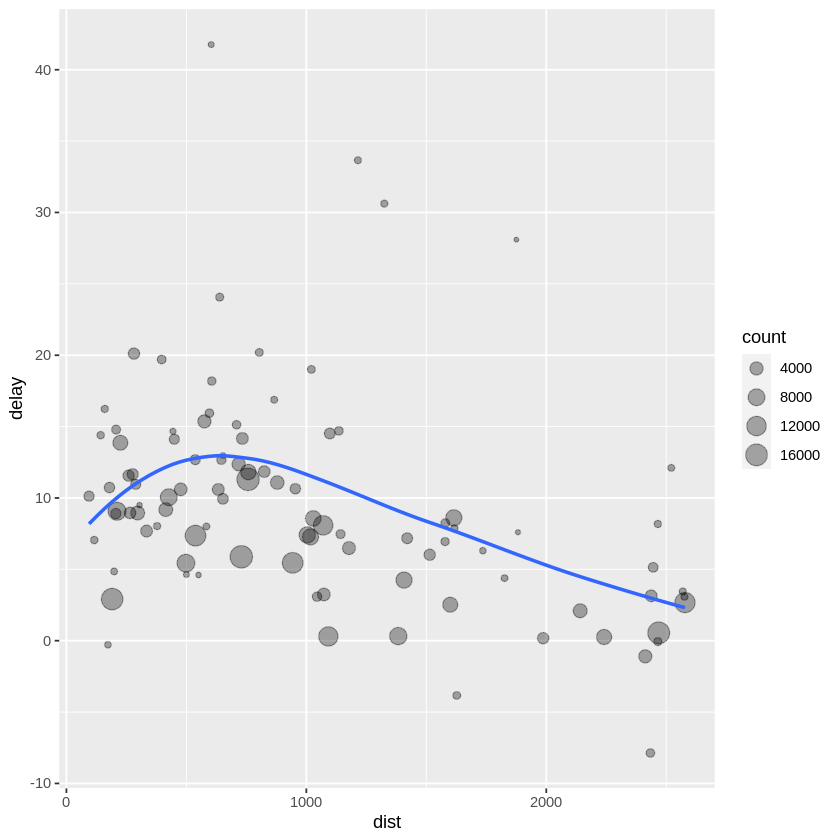

In [67]:
flights %>% group_by(dest) %>% 
   summarise(count = n(), dist = mean(distance, na.rm = TRUE), delay = mean(arr_delay, na.rm = TRUE) ) %>%
   filter(count > 20, dest != "HNL") %>% 
ggplot(mapping = aes(x = dist, y = delay)) +
  geom_point(aes(size = count), alpha = 1/3) +
  geom_smooth(se = FALSE)
#ggplot은 잠시 후에 배울 예정
#dist와 delay로 ggplot을 그려줌

delay가 dist가 750까지는 늘어나다가 dist가 더 멀어지니까 점점 더 줄어듬을 볼 수 있다

## Data visualization - ggplot

In [68]:
?mpg

Warning message in seq_len(head.end.idx):
“first element used of 'length.out' argument”
ERROR while rich displaying an object: Error in seq_len(head.end.idx): argument must be coercible to non-negative integer

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_conte

In [69]:
mpg
#자동차 관련 데이터

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact


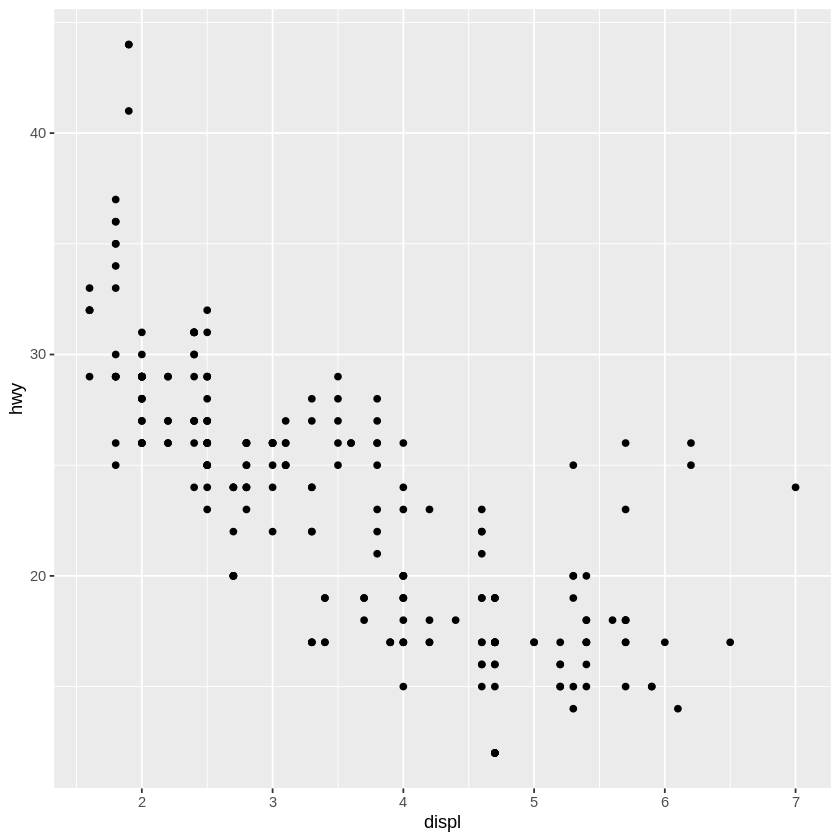

In [70]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy))

declare global mapping information in ggplot()

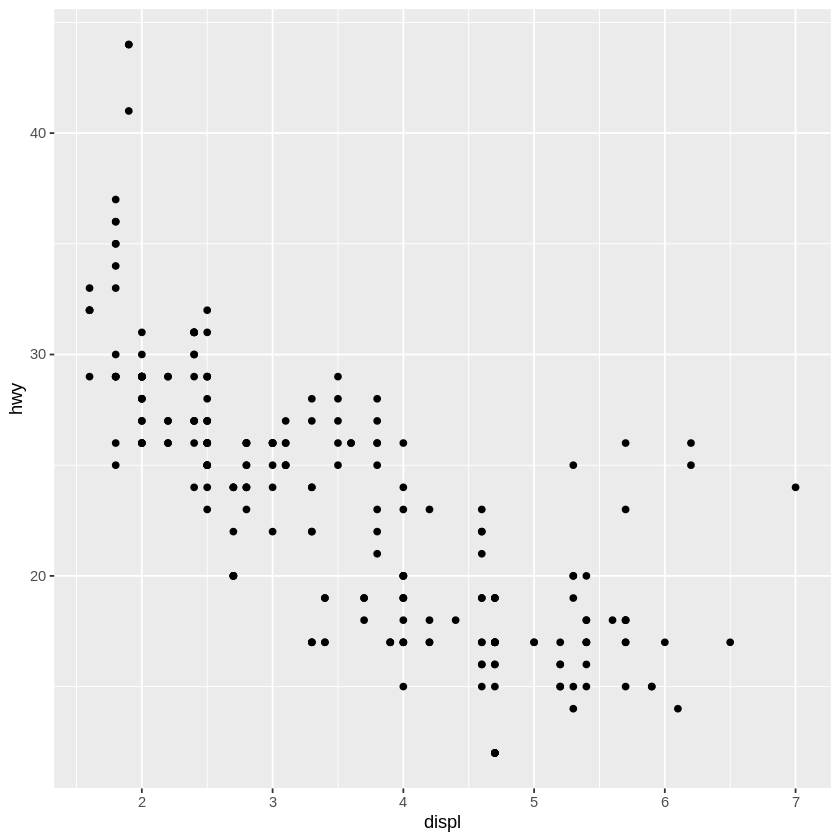

In [71]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) + 
  geom_point()
#mapping을 ggplot안에 해도 똑같이 작동함

Add graphical layers

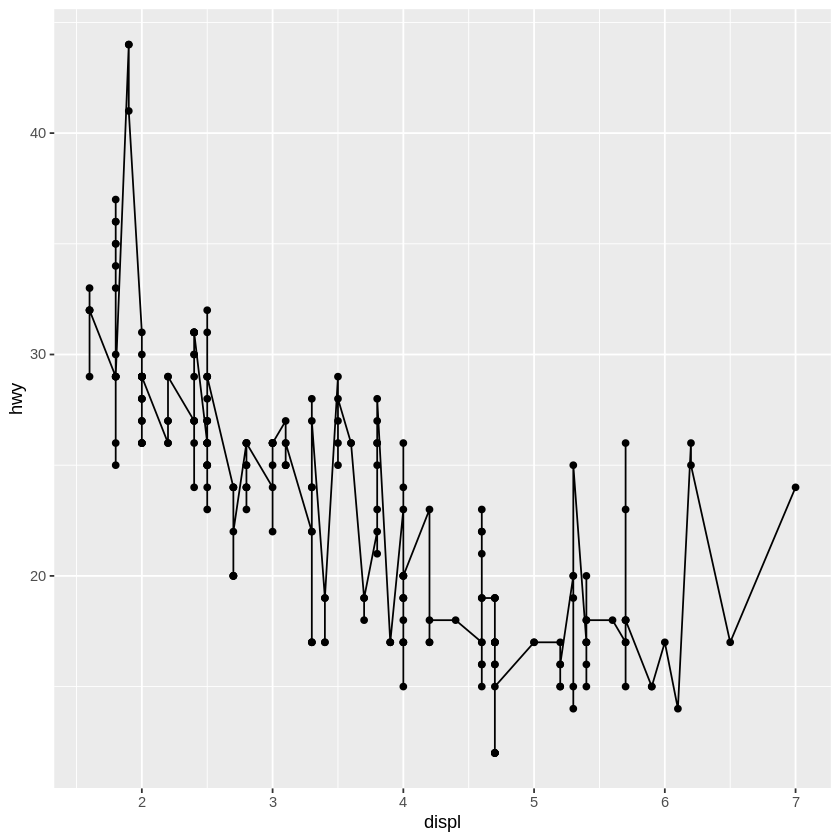

In [72]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) + 
  geom_point() +
  geom_line()

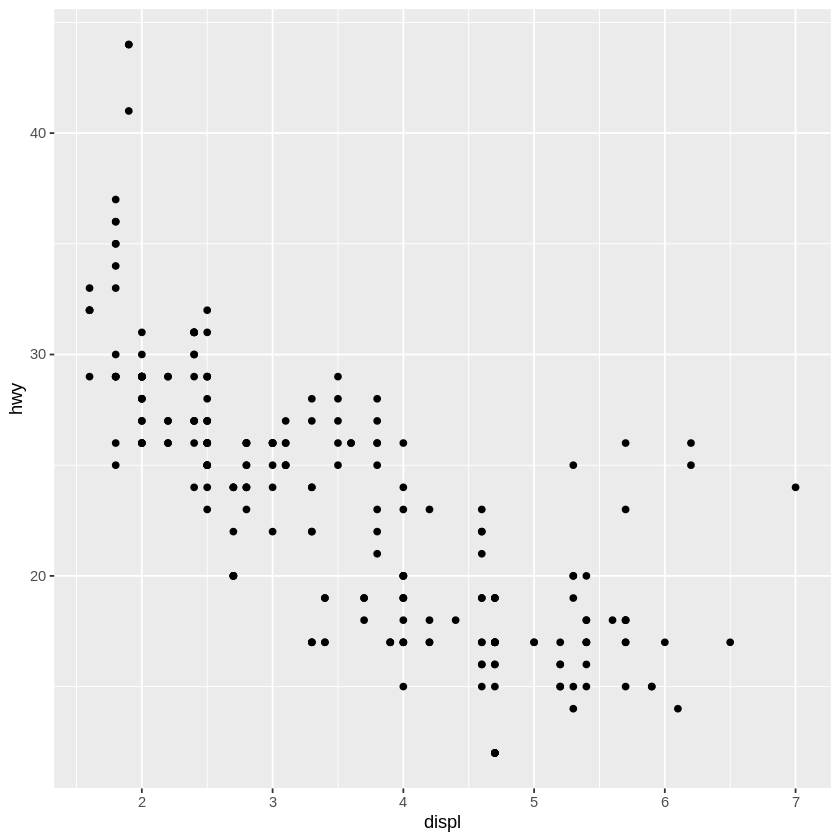

In [74]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) + 
  geom_point()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



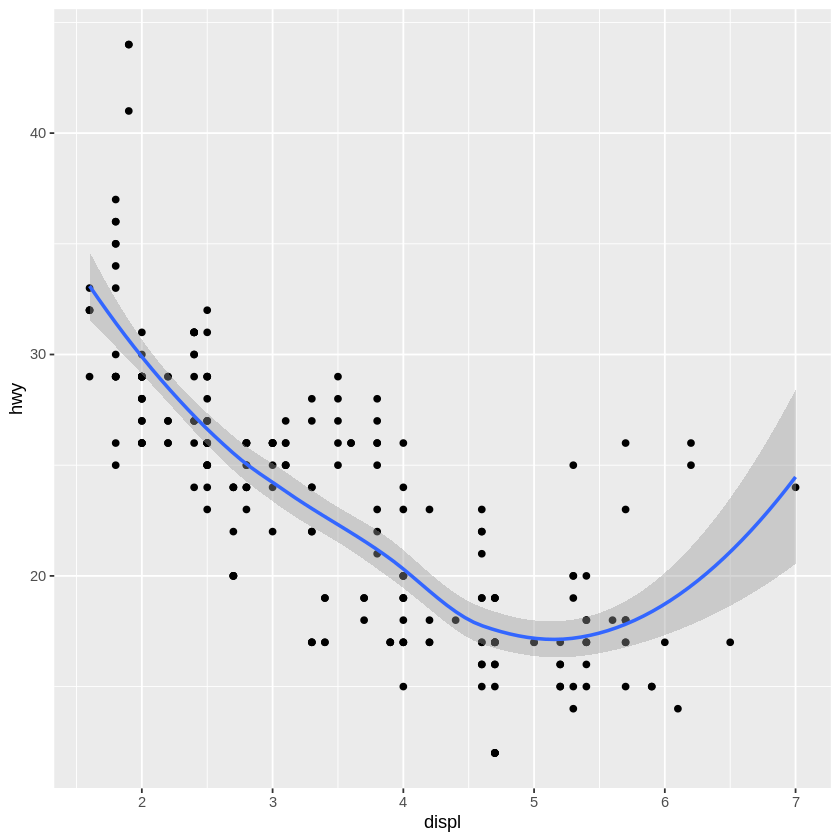

In [76]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) + 
  geom_point() + geom_smooth()
  #spline을 적합

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



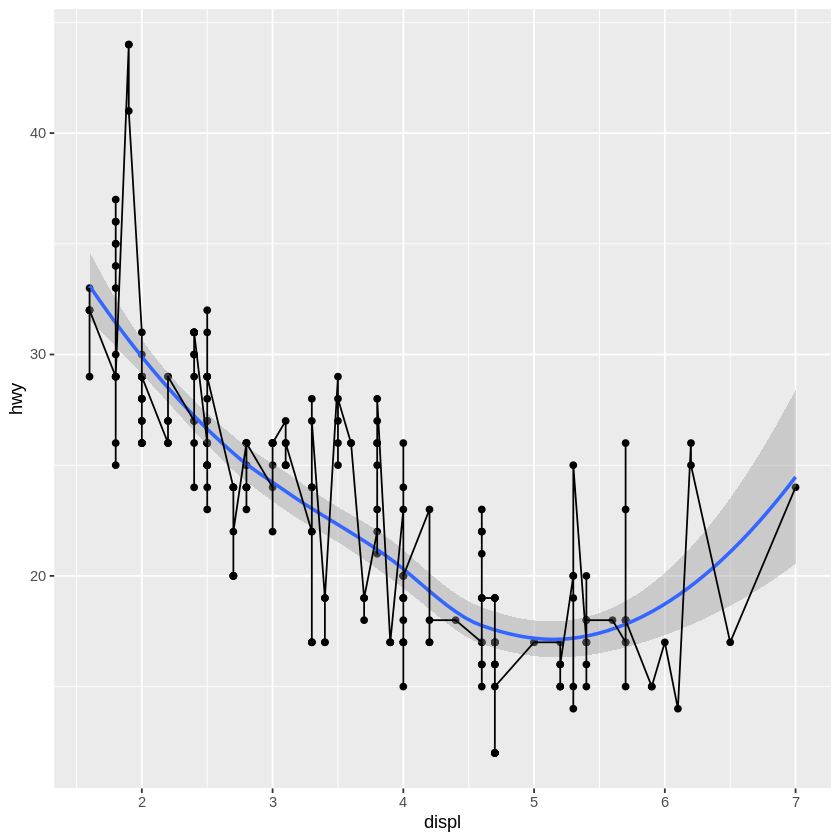

In [77]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) + 
  geom_point() + geom_smooth() + geom_line()
#계속 layer들을 달아줌, 레이어 모두 동일한 매핑을 하기 때문에 글로벌하게 달아줌

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



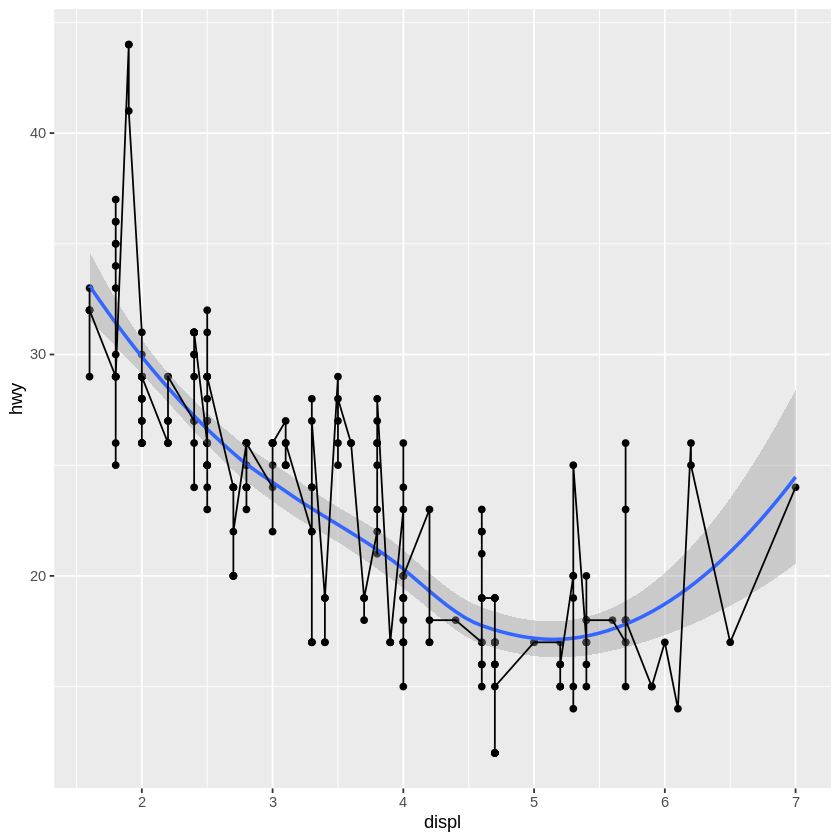

In [79]:
ggplot(data = mpg) + 
  geom_point(, mapping = aes(x = displ, y = hwy)) + geom_smooth(, mapping = aes(x = displ, y = hwy)) + geom_line(, mapping = aes(x = displ, y = hwy))
#각자 따로 매핑을 달아줄 수 도 있음

option에 대한 예제

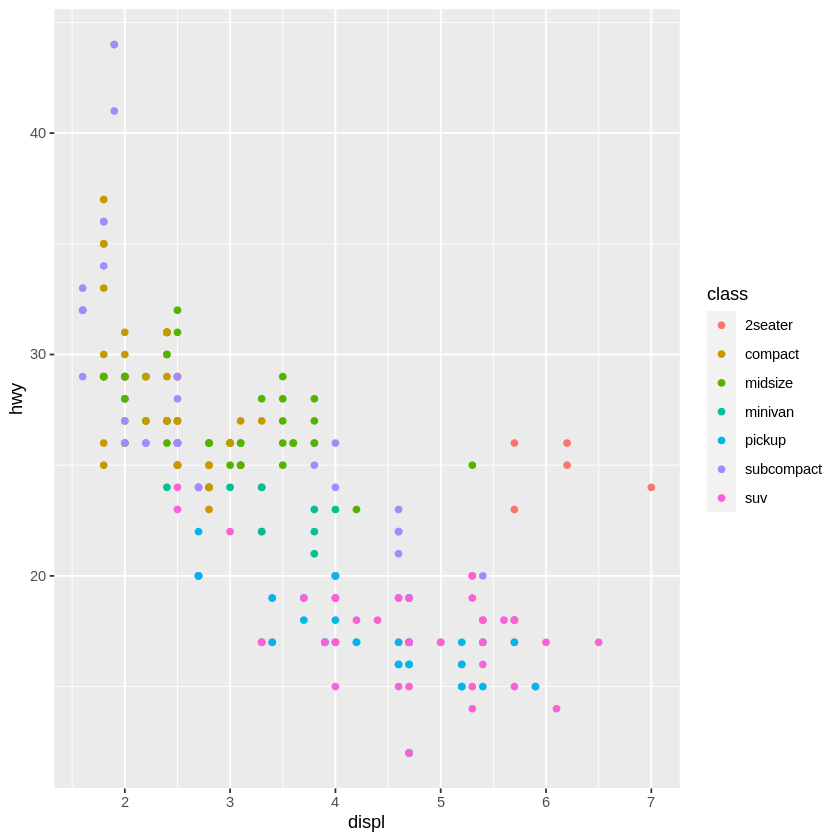

In [80]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy, color = class)) + geom_point()

Warning message:
“Using size for a discrete variable is not advised.”


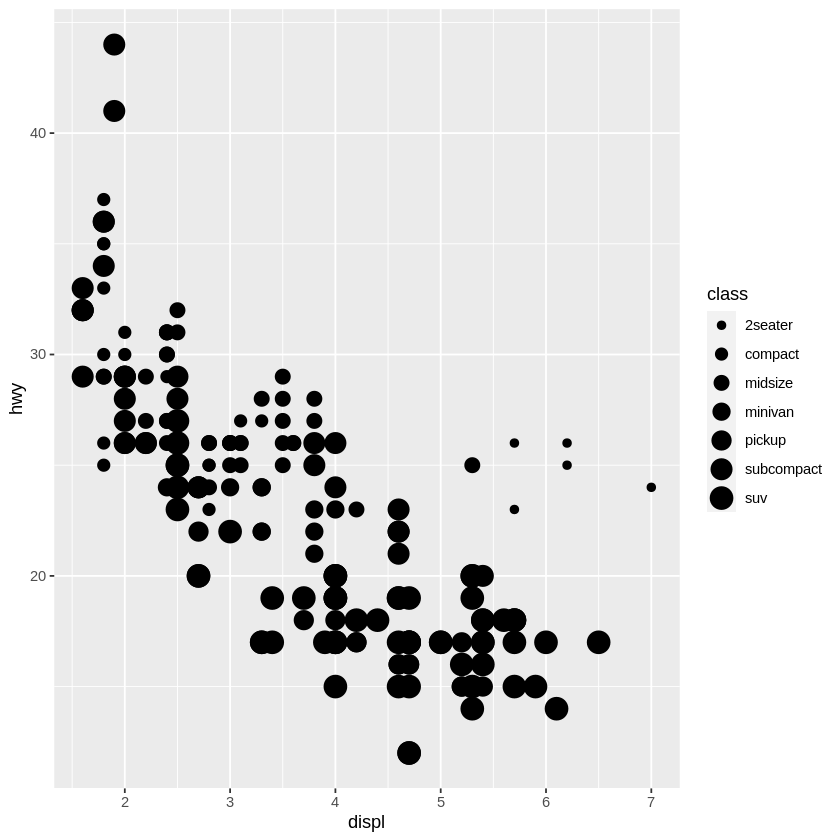

In [81]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy, size = class)) + geom_point()

Warning message:
“Using alpha for a discrete variable is not advised.”


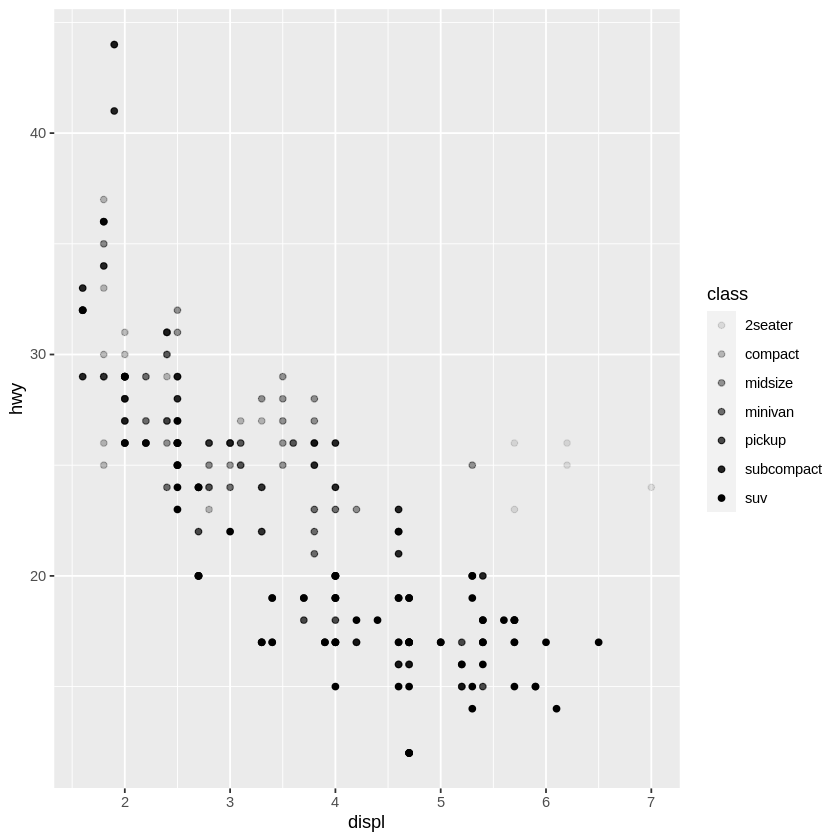

In [83]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy, alpha = class)) + geom_point()
#연한 정도로 표시

Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 7. Consider
specifying shapes manually if you must have them.”
Warning message:
“Removed 62 rows containing missing values (geom_point).”


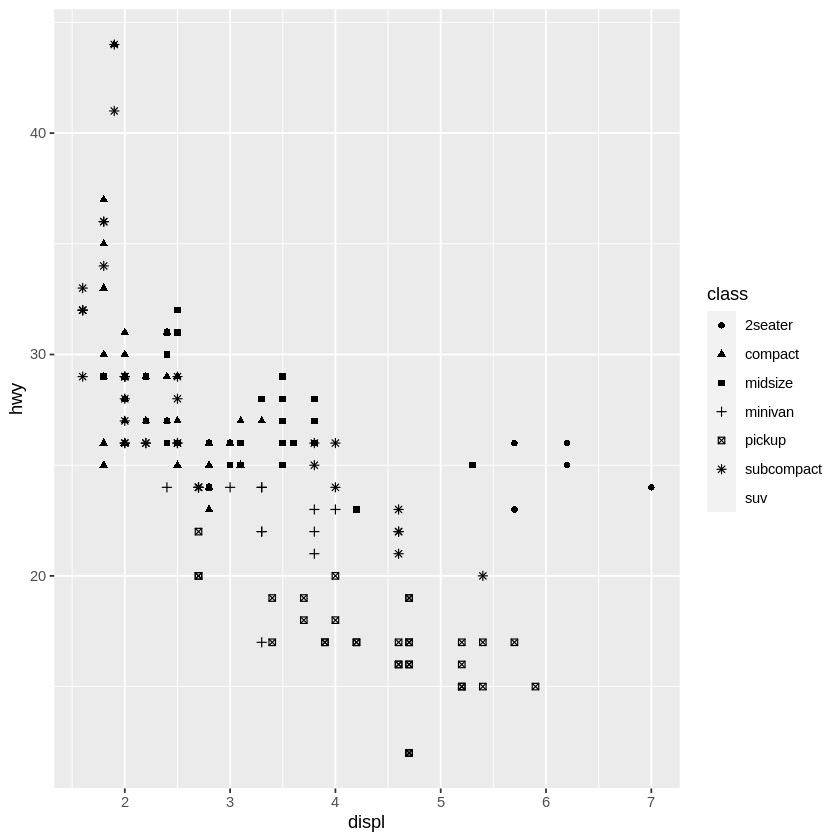

In [84]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy, shape = class)) + geom_point()
#모양을 다르게 해서 표시, suv는 해당되는 게 없어서 warning이 뜸

### Facets

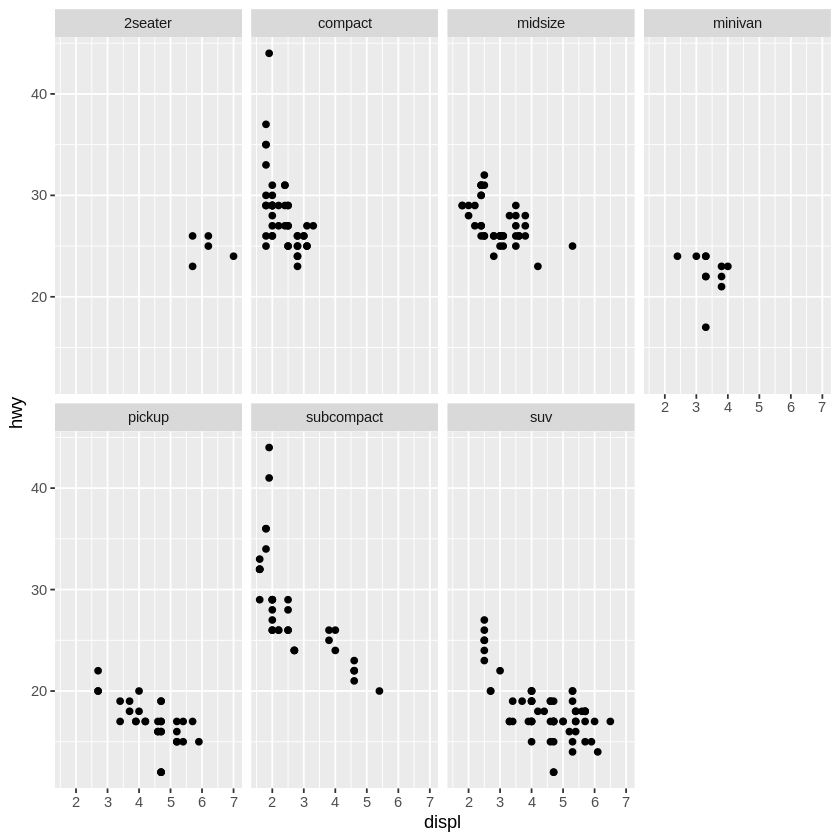

In [85]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_wrap(~ class, nrow = 2)
#각 클래스별로 따로 시각화해서 볼 수 있음

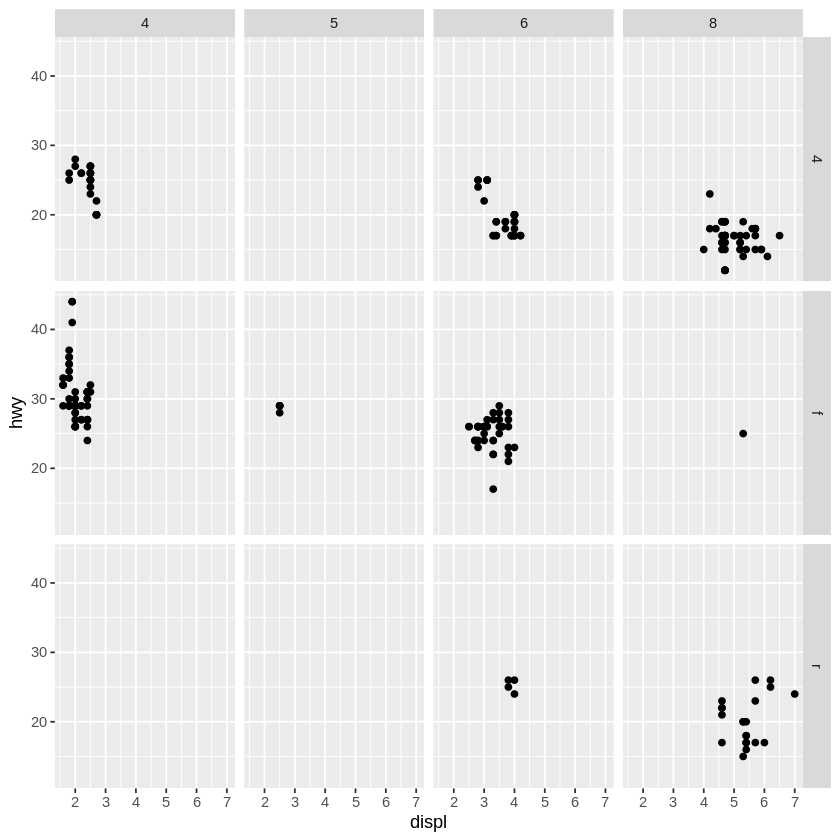

In [92]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_grid(drv ~ cyl)
#2개에 대해서 보고 싶을 때
#한쪽이 cyl, 한쪽이 drv

In [91]:
mpg %>% head()
#오른쪽이 drv, 위쪽이 cyl임을 확인

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


In [93]:
diamonds

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48
0.24,Very Good,I,VVS1,62.3,57,336,3.95,3.98,2.47
0.26,Very Good,H,SI1,61.9,55,337,4.07,4.11,2.53
0.22,Fair,E,VS2,65.1,61,337,3.87,3.78,2.49


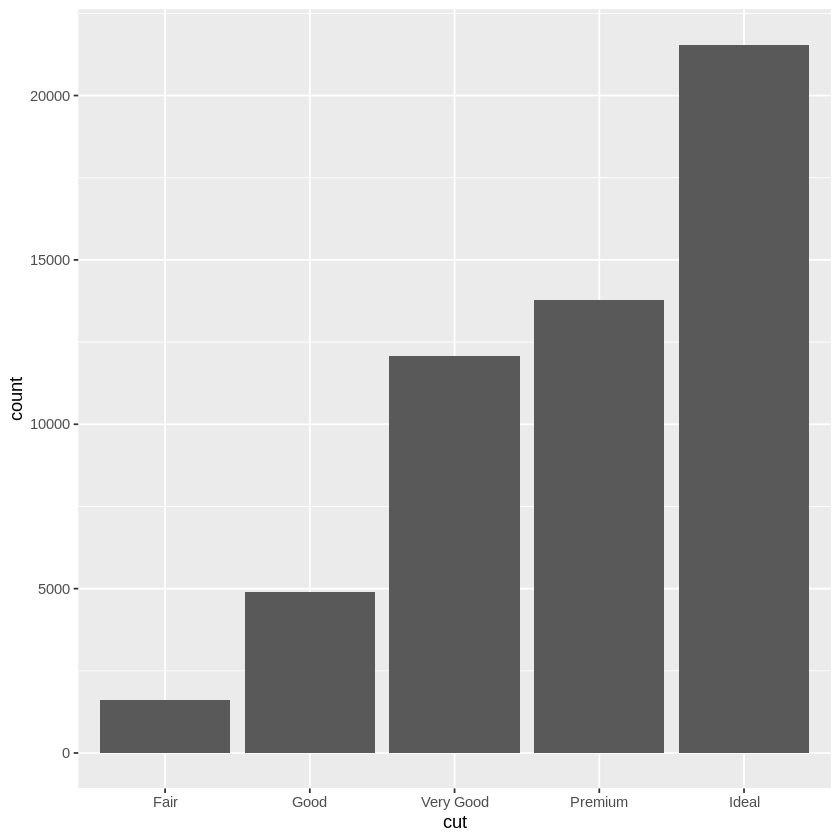

In [95]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut))
#barplot도 그릴 수 있음

In [96]:
demo <- tribble(
  ~cut,         ~freq,
  "Fair",       1610,
  "Good",       4906,
  "Very Good",  12082,
  "Premium",    13791,
  "Ideal",      21551
)
demo
#데이터 자체가 그것에 대한 frequency가 있으면 y축을 추가할 수 있다

cut,freq
<chr>,<dbl>
Fair,1610
Good,4906
Very Good,12082
Premium,13791
Ideal,21551


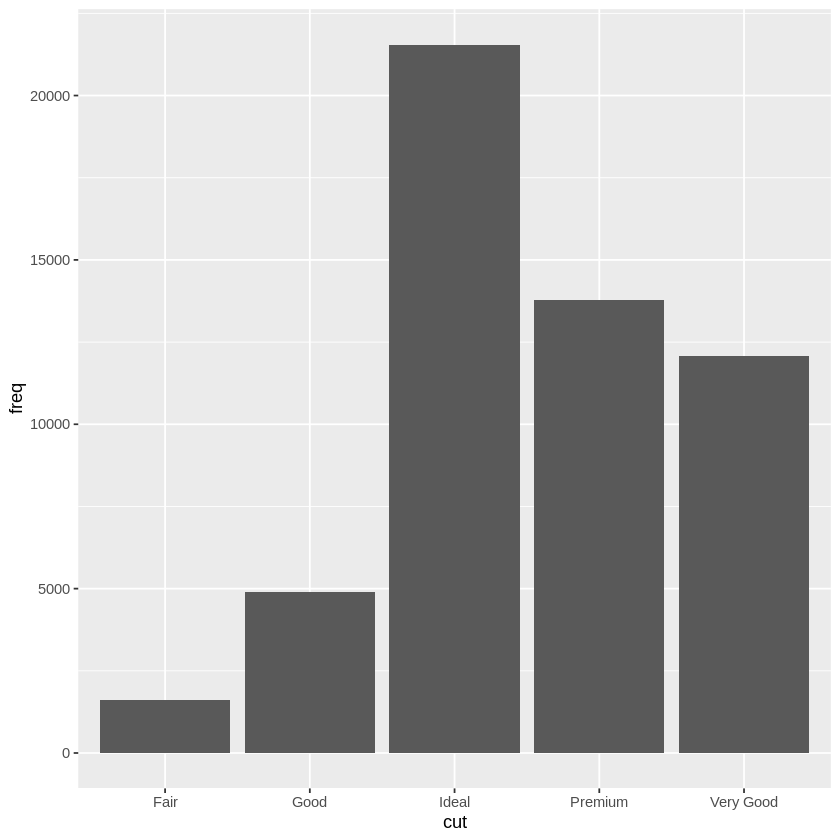

In [97]:
ggplot(data = demo) +
  geom_bar(mapping = aes(x = cut, y = freq), stat = "identity")
#해당 정보로 그림을 그릴 수 있다

#### Positional adjustment for barplot

position =  "identity", "dodge" or "fill"

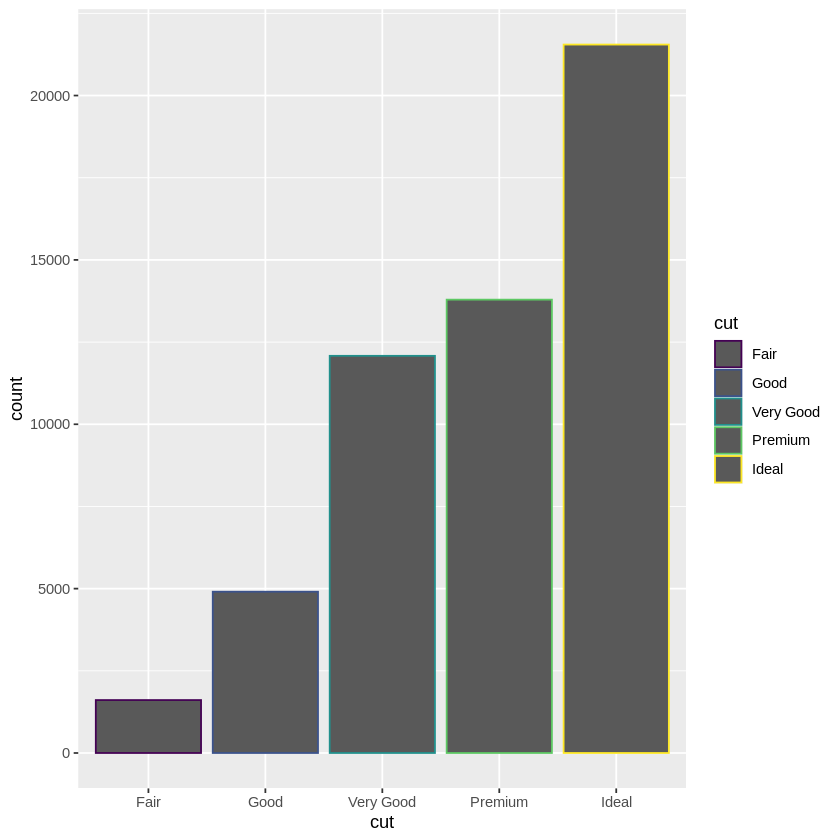

In [99]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, colour = cut))
# colour는 겉으로 하는 것이라서 잘 안보임 -> fill로 나눈것이 더 나음

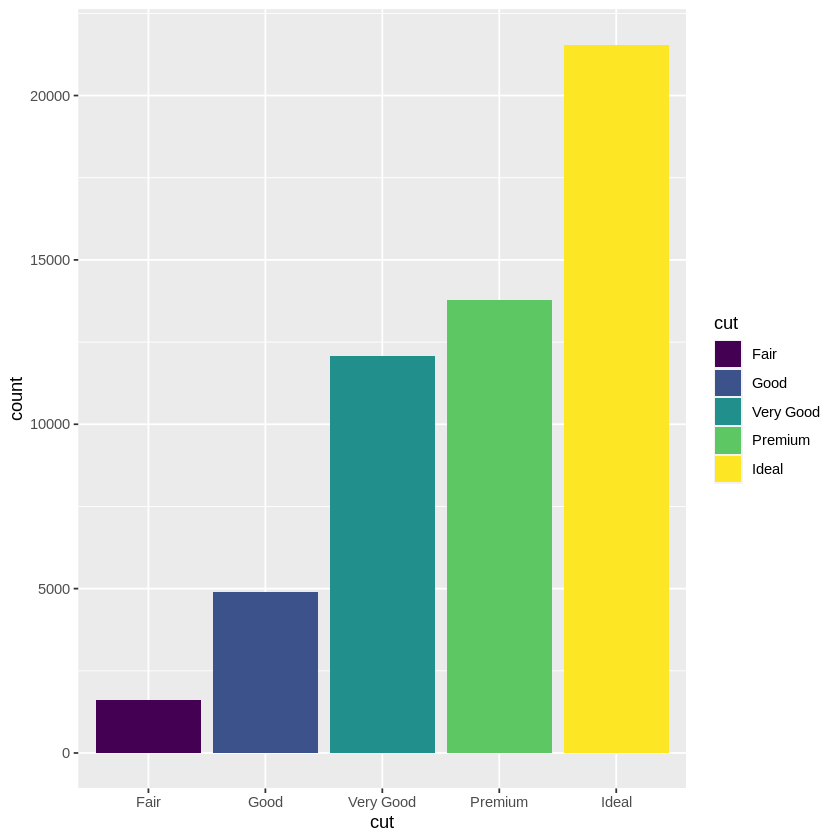

In [100]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, fill = cut))
#색상별로 구분

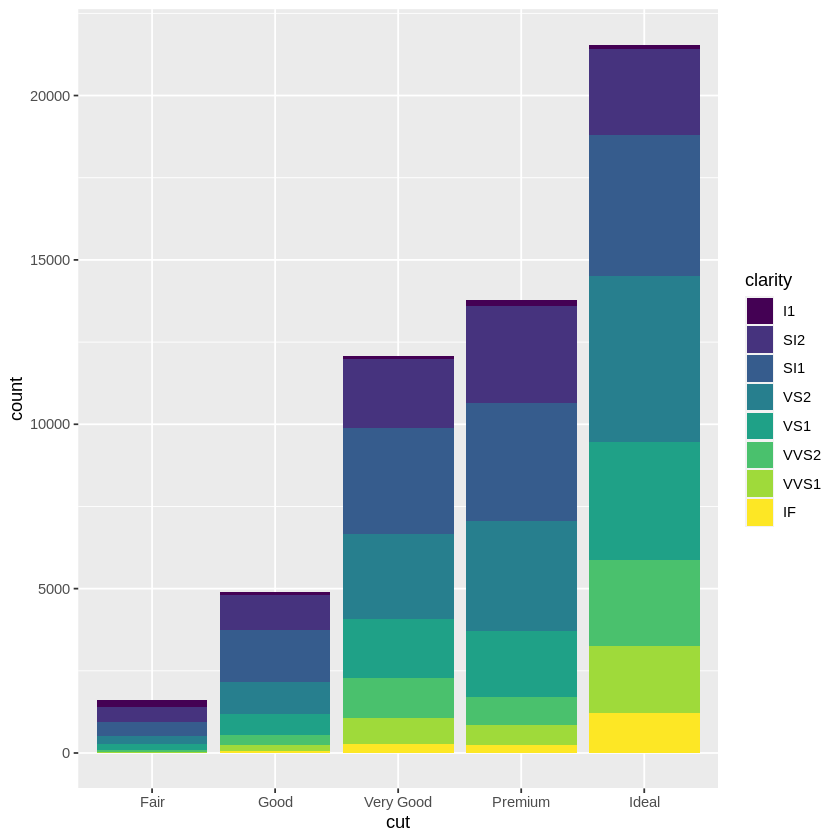

In [101]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, fill = clarity))
#clarity의 비율을 시각적으로 보여줌

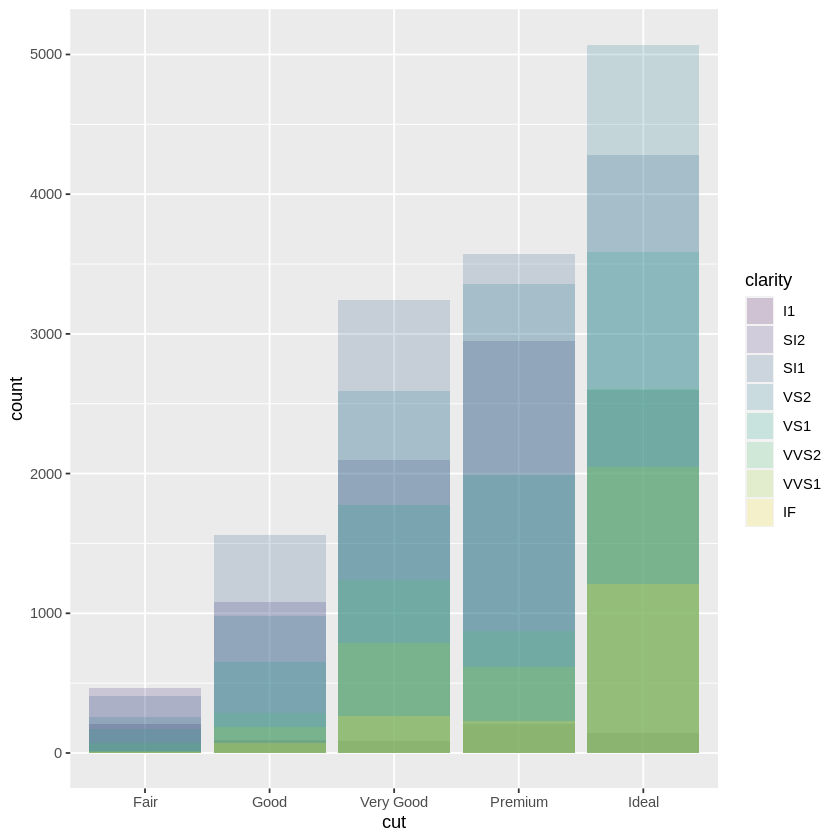

In [102]:
ggplot(data = diamonds, mapping = aes(x = cut, fill = clarity)) + 
  geom_bar(alpha = 1/5, position = "identity")
#alpha로 조절해서 그릴 수도 있음

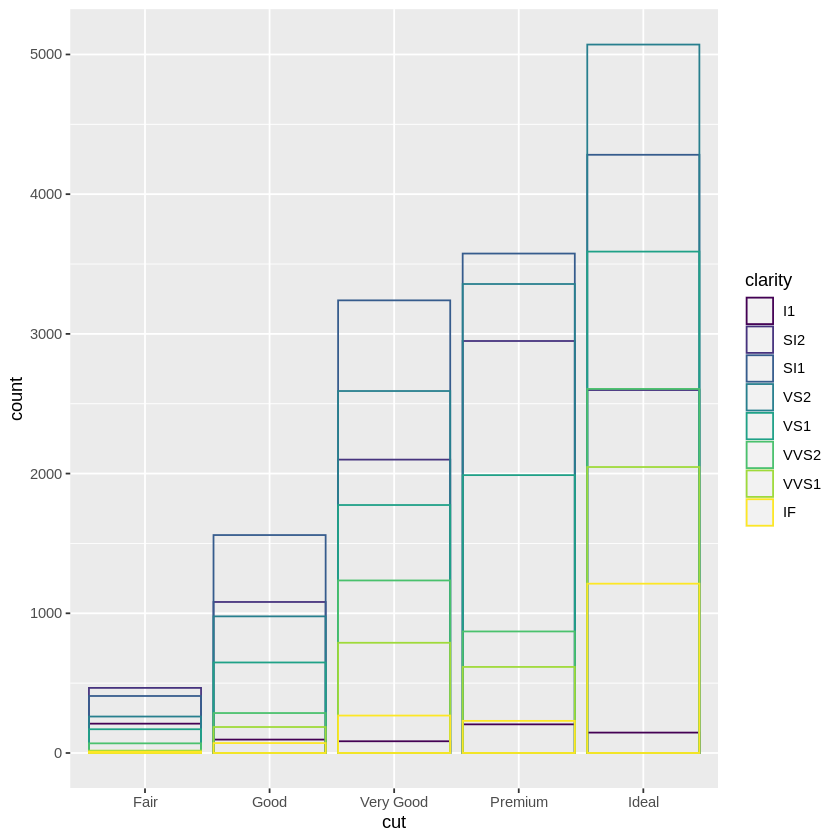

In [103]:
ggplot(data = diamonds, mapping = aes(x = cut, colour = clarity)) + 
  geom_bar(fill = NA, position = "identity")
#colour라서 겉으로 표현

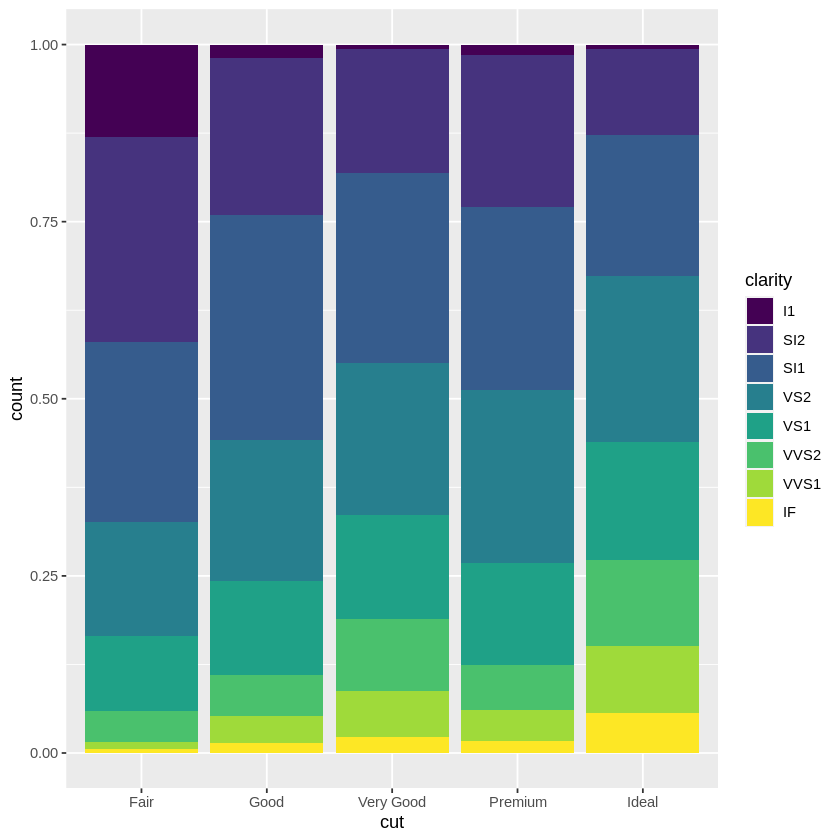

In [104]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, fill = clarity), position = "fill")
#전체의 비율로 표현

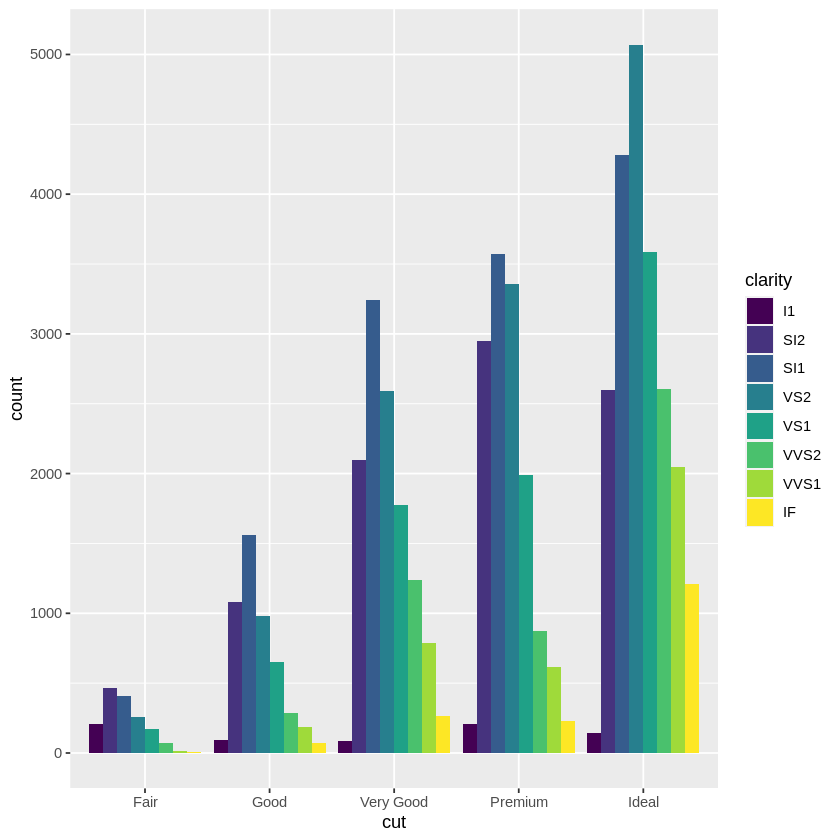

In [106]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, fill = clarity), position = "dodge")
#dodge는 옆으로 보여줌

#### cordinate flip

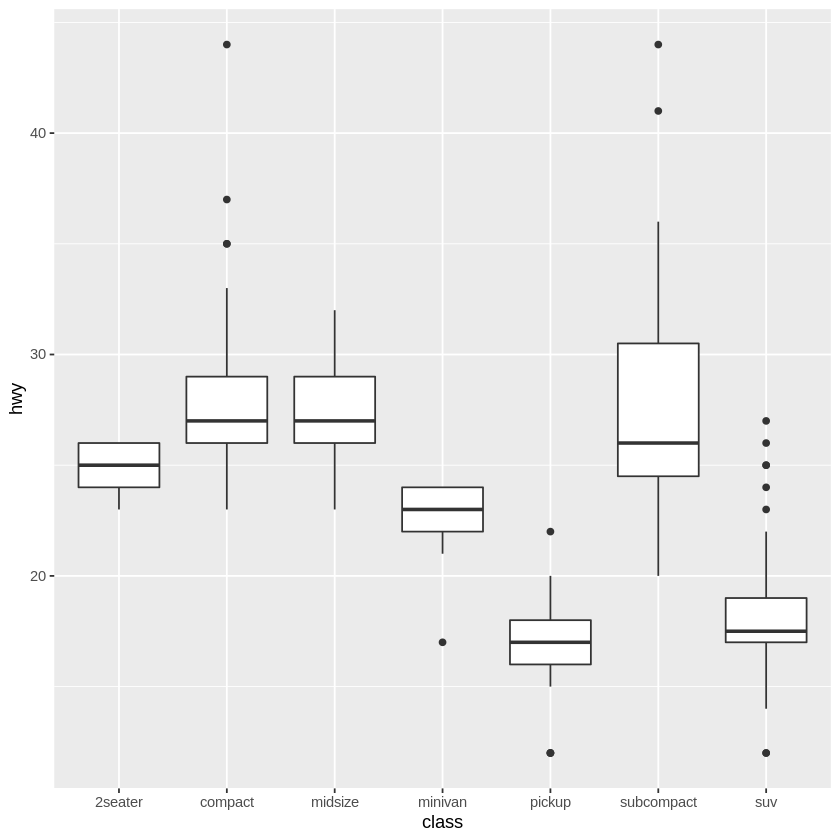

In [107]:
ggplot(data = mpg, mapping = aes(x = class, y = hwy)) + 
  geom_boxplot()

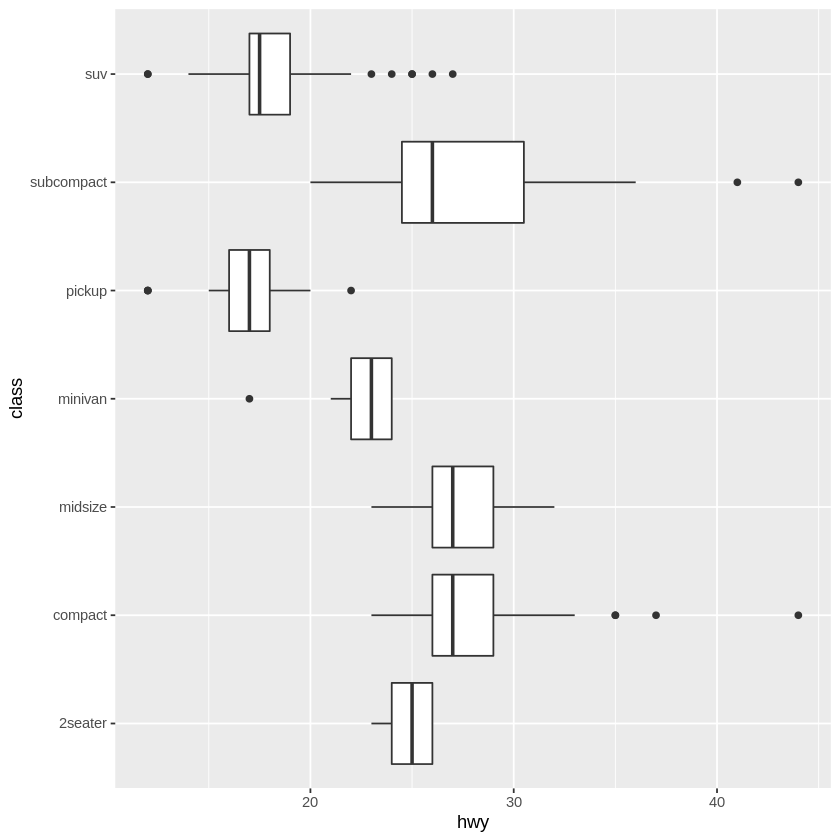

In [109]:
ggplot(data = mpg, mapping = aes(x = class, y = hwy)) + 
  geom_boxplot() +
  coord_flip()
#텍스트가 길면 잘리는 경우가 있으므로 coordinate flip으로 회전하는 방법도 있음

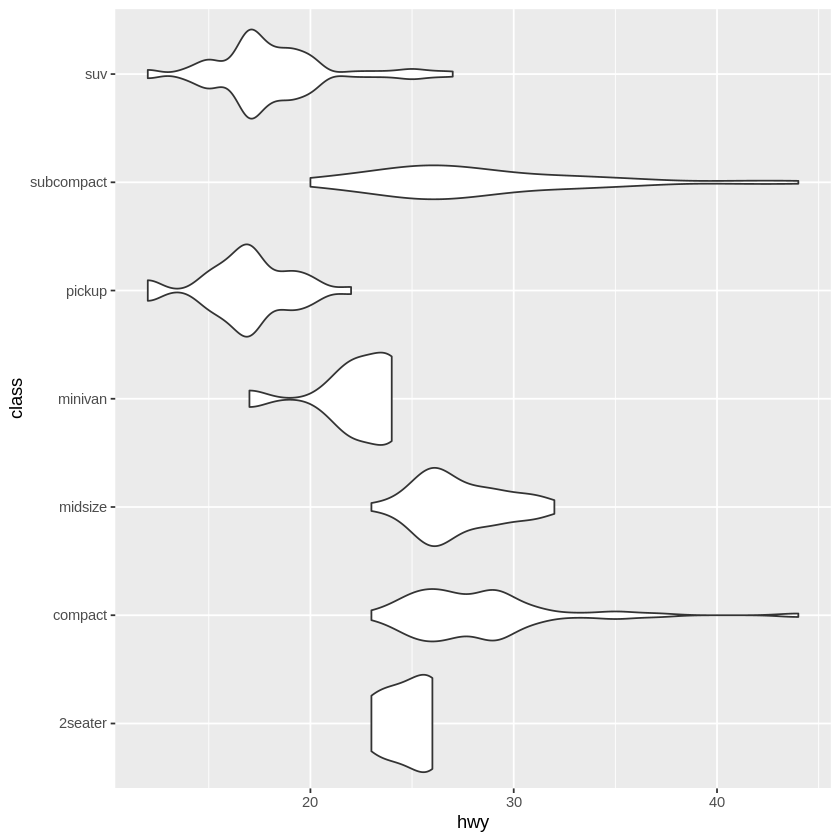

In [110]:
ggplot(data = mpg, mapping = aes(x = class, y = hwy)) + 
  geom_violin() +
  coord_flip()
# barplot, boxplot, viloinplot(분포를 보여줌, 많이 씀)

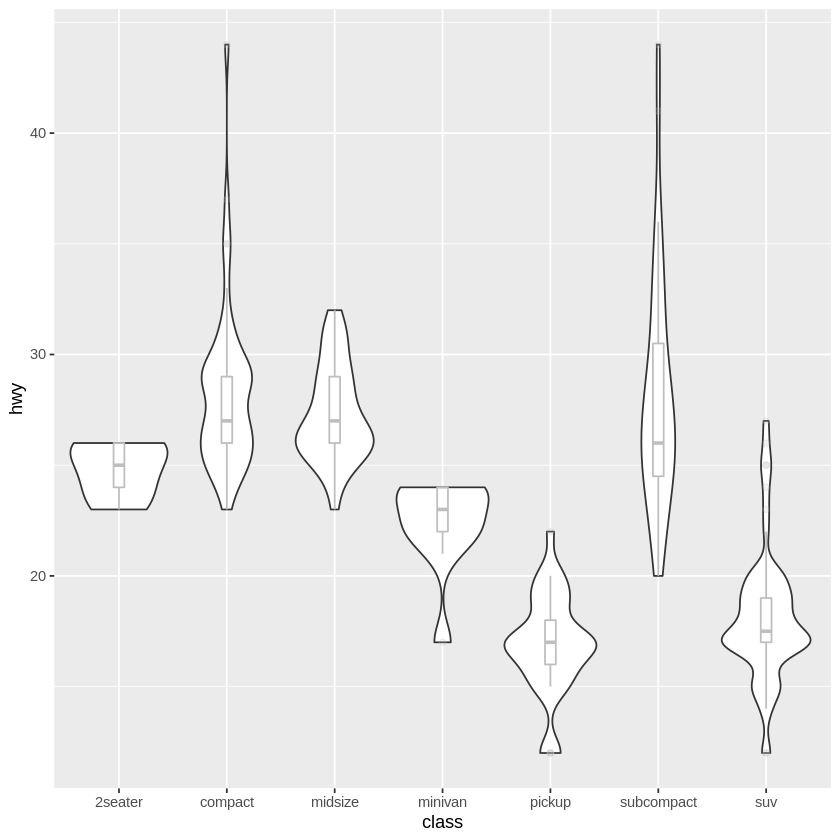

In [111]:
ggplot(data = mpg, mapping = aes(x = class, y = hwy)) + 
  geom_violin() + geom_boxplot(width=0.1, color="grey", alpha=0.2)
#violinplot 안에 boxplot을 넣는 것도 많이 씀

### Theme

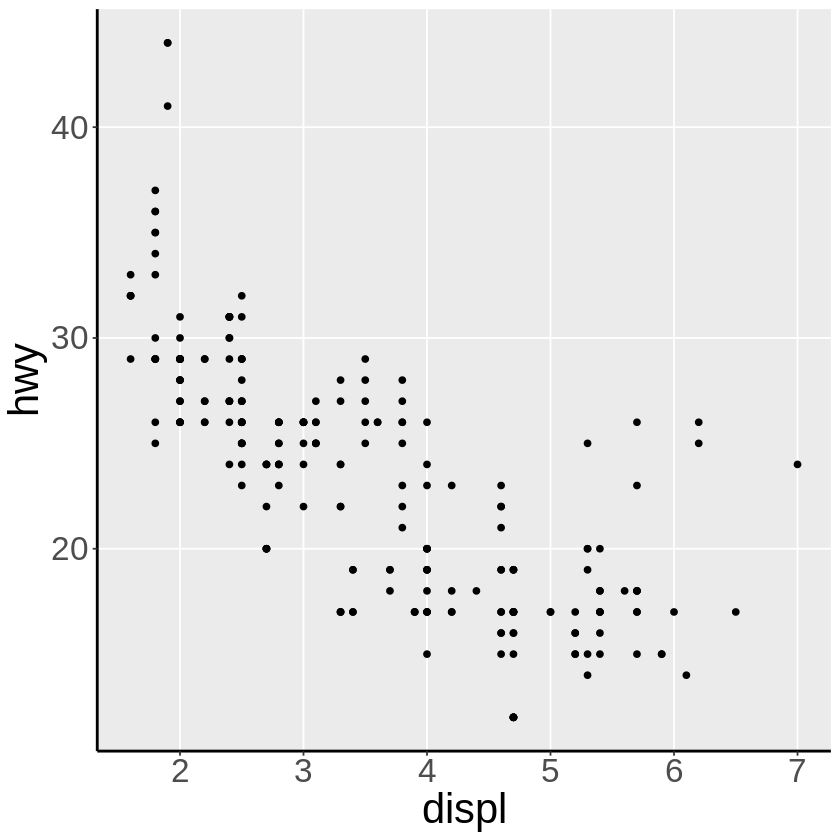

In [112]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + theme_grey() +
  theme(axis.line= element_line(size=.8, colour = "black"),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        text = element_text(size = 25))
#기본 theme

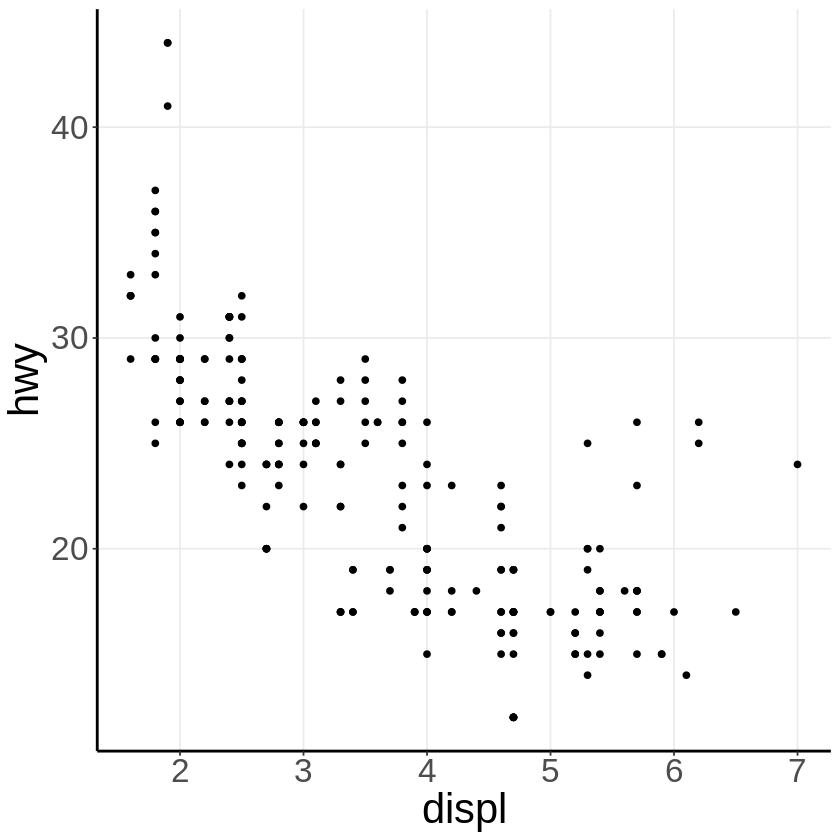

In [114]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + theme_bw() +
  theme(axis.line= element_line(size=.8, colour = "black"),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        text = element_text(size = 25))
#하얀 바탕으로 설정

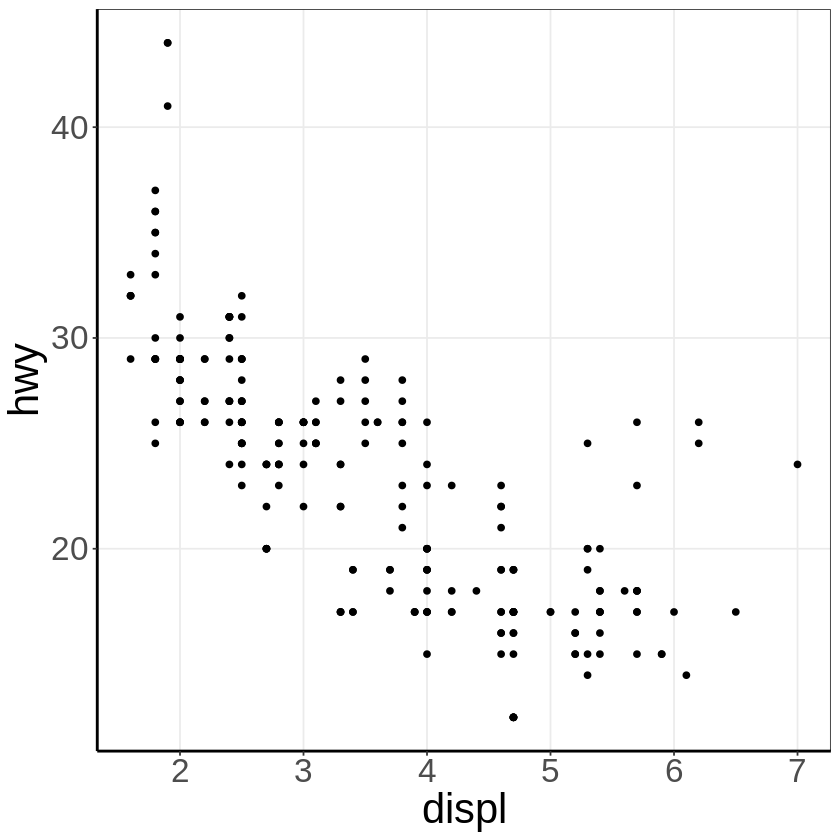

In [115]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + theme_bw() +
  theme(axis.line= element_line(size=.8, colour = "black"),
        panel.grid.minor = element_blank(),
#        panel.border = element_blank(),
        text = element_text(size = 25))

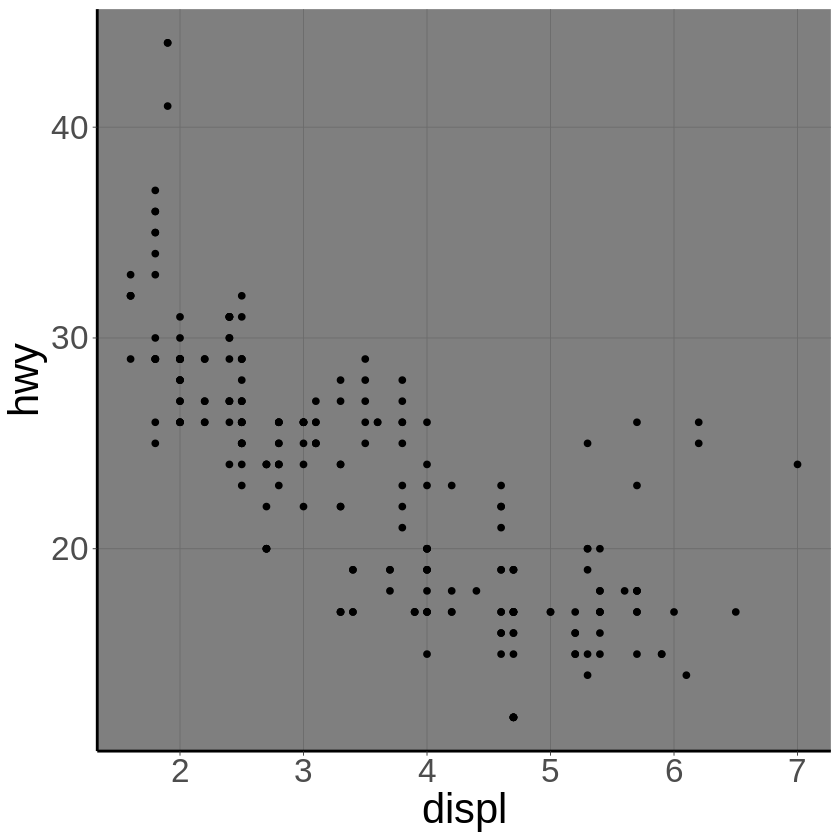

In [117]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + theme_dark() +
  theme(axis.line= element_line(size=.8, colour = "black"),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        text = element_text(size = 25))

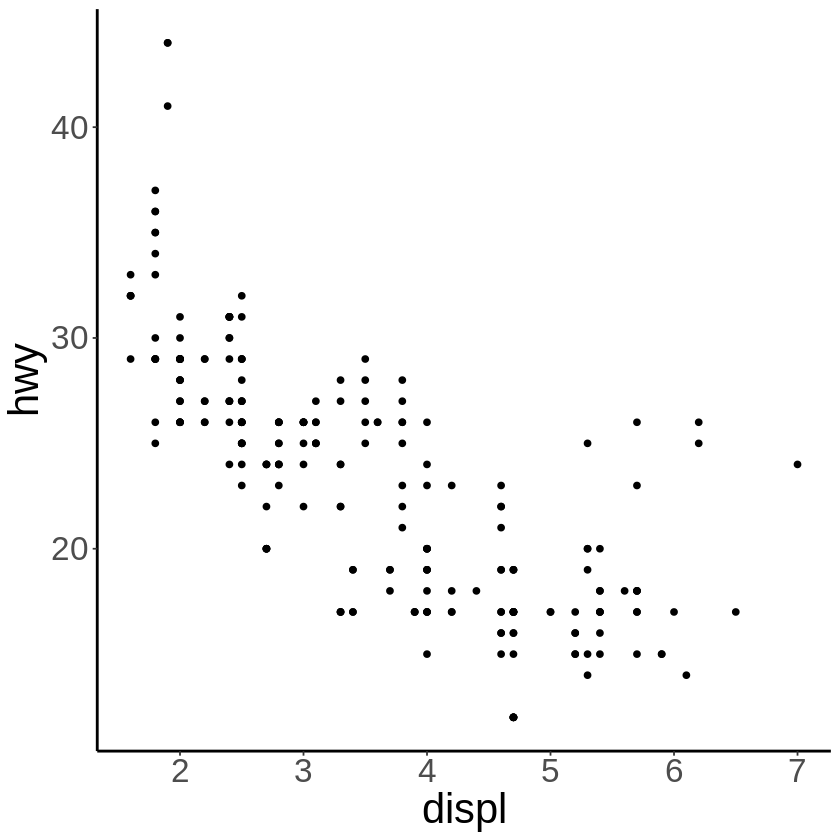

In [118]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + theme_test() +
  theme(axis.line= element_line(size=.8, colour = "black"),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        text = element_text(size = 25))
#좀 더 깔끔

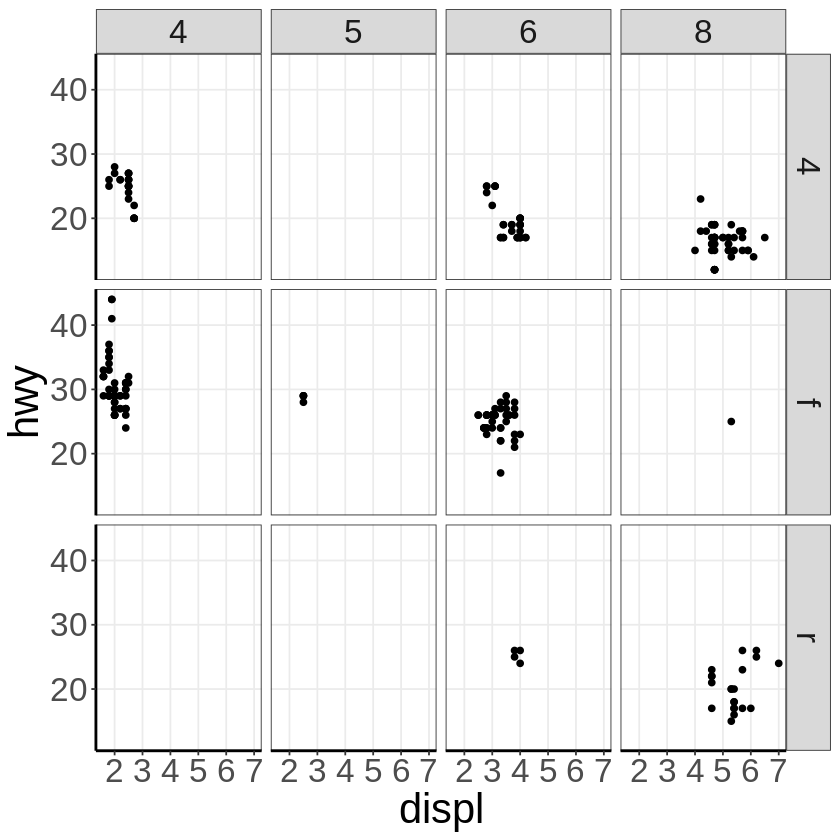

In [119]:
ggplot(data = mpg) + theme_bw() +
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_grid(drv ~ cyl)  +
  theme(axis.line= element_line(size=.8, colour = "black"),
        panel.grid.minor = element_blank(),
        text = element_text(size = 25))

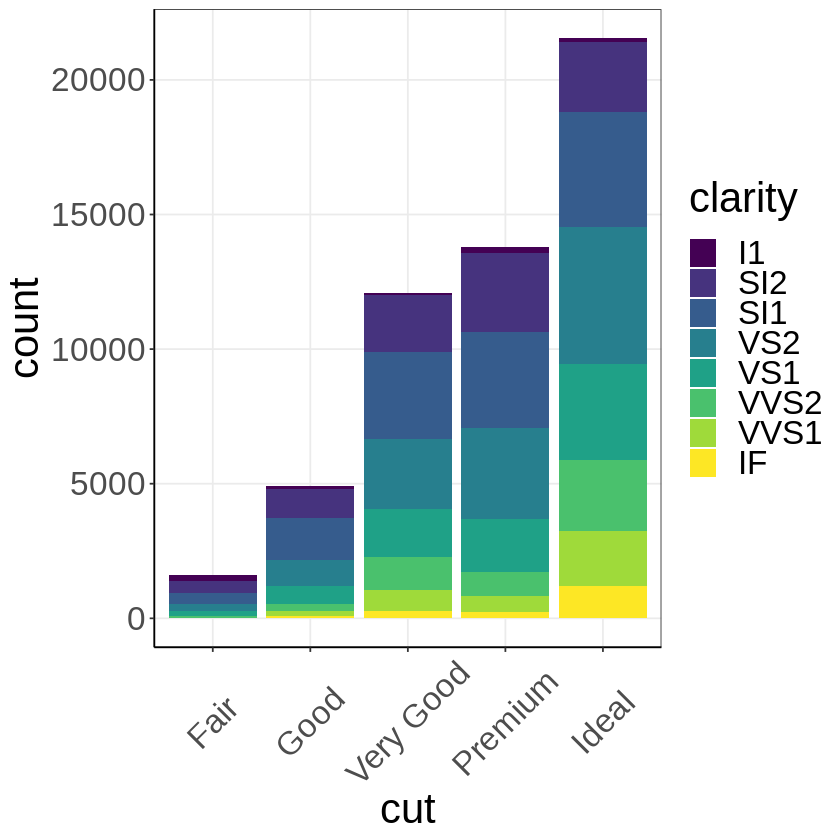

In [120]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, fill = clarity)) + theme_bw() +
  theme(axis.line= element_line(colour = "black"),
        panel.grid.minor = element_blank(),
#        panel.border = element_blank(),
        text = element_text(size = 25), 
        axis.text.x = element_text(angle= 45, vjust = .5)
        )
#x축만 조절

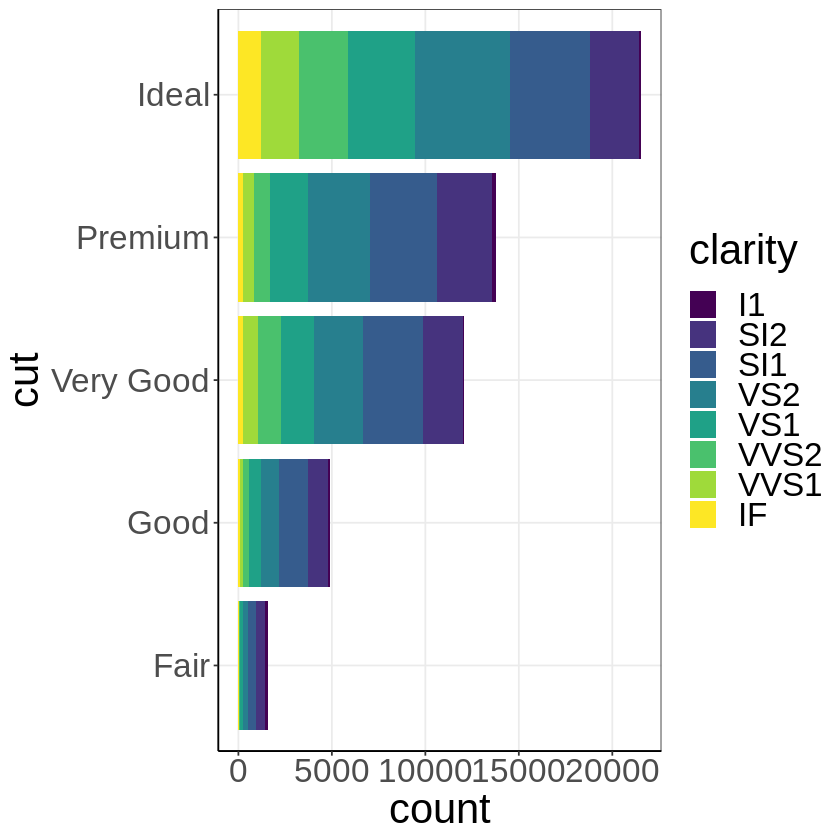

In [123]:
# png("Fig.png", width = 7, height = 3, units = 'in', res = 300)
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, fill = clarity)) + theme_bw() +
  theme(axis.line= element_line(colour = "black"),
        panel.grid.minor = element_blank(),
#        panel.border = element_blank(),
        text = element_text(size = 25), 
#        axis.text.x = element_text(angle= 45, vjust = .5)
        ) +   coord_flip()
#dev.off()

#회전시키기가 싫어서 coordinate flip을 하니까 너무 찌부됨
# 주석처리된 코드를 지우면 png파일로 저장할 수 있다

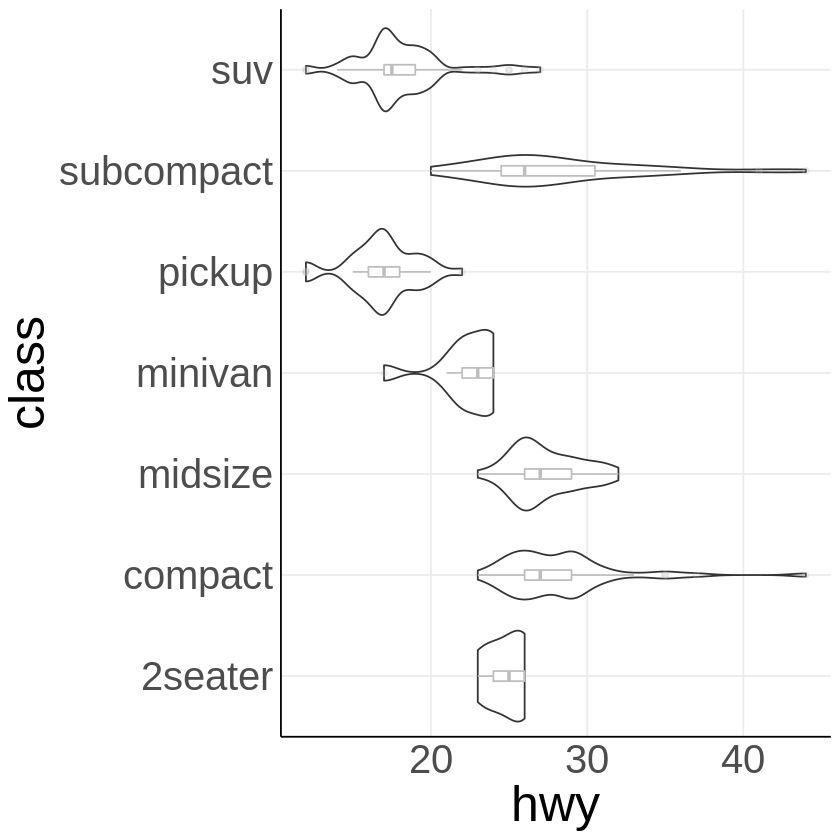

In [122]:
ggplot(data = mpg, mapping = aes(x = class, y = hwy)) + 
  geom_violin() + geom_boxplot(width=0.1, color="grey", alpha=0.2) + theme_minimal()+
  theme(axis.line= element_line(colour = "black"),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        text = element_text(size = 30), 
        ) +   coord_flip()